## MGMT minus WT in 100 Kb bins

This notebook was used to calculate and plot Supplementary Figure 8A.
Jasmina Kubitschek, 2024

In [1]:
#importing necessary modules
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sys
print(sys.version)

3.11.6 (main, Jun  7 2024, 07:09:59) [GCC 13.2.0]


In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['mathtext.default'] = "regular"

matplotlib.rcParams['font.size'] = 16

In [3]:
# path to working folder
path = '/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/O6meG_revision/Plotting/'   

In [4]:
# folder paths
data_path = path + 'Source_data/'
graph_path = path + 'Graphs/Supplementary_figures/'

In [5]:
# load data
cell_vs_gDNA = pd.read_csv(data_path+'nDNA_normalized_cell_samples_100K_binned_data.csv', index_col=0)
no_gaps = pd.read_csv(data_path+'Genome_bins_100KB_without_centromeres_or_gaps.csv', index_col=0)
no_gaps = no_gaps.rename(columns={'chrom':'Chr'})

## Prepare dataframes and subtract WT from MGMT 

In [6]:
cell_vs_gDNA

Bin  Bin_size   Chr  cell_nDNA_difference  cell_nDNA_ratio  \
0               0.0  100000.0  chr1              0.014783         1.417784   
1          100000.0  100000.0  chr1              0.018331         1.950031   
2          200000.0  100000.0  chr1              0.002665         6.664672   
3          300000.0  100000.0  chr1              0.000000         1.000000   
4          400000.0  100000.0  chr1             -0.000470         0.000000   
...             ...       ...   ...                   ...              ...   
909625  155600000.0  100000.0  chrX              0.078791         1.272022   
909626  155700000.0  100000.0  chrX             -0.007965         0.970383   
909627  155800000.0  100000.0  chrX              0.025438         1.081455   
909628  155900000.0  100000.0  chrX              0.012516         1.040390   
909629  156000000.0   40894.0  chrX              0.018583         1.197610   

       replicate         condition                 sample  
0           rep1         WT_1mM_3x         WT_1mM_3x_rep1  
1           rep1         WT_1mM_3x         WT_1mM_3x_rep1  
2           rep1         WT_1mM_3x         WT_1mM_3x_rep1  
3           rep1         WT_1mM_3x         WT_1mM_3x_rep1  
4           rep1         WT_1mM_3x         WT_1mM_3x_rep1  
...          ...               ...                    ...  
909625      rep3  MGMT_DMSOctrl_1x  MGMT_DMSOctrl_1x_rep3  
909626      rep3  MGMT_DMSOctrl_1x  MGMT_DMSOctrl_1x_rep3  
909627      rep3  MGMT_DMSOctrl_1x  MGMT_DMSOctrl_1x_rep3  
909628      rep3  MGMT_DMSOctrl_1x  MGMT_DMSOctrl_1x_rep3  
909629      rep3  MGMT_DMSOctrl_1x  MGMT_DMSOctrl_1x_rep3  

[909630 rows x 8 columns]

In [7]:
WT_data = cell_vs_gDNA[cell_vs_gDNA['condition'] == 'WT_1mM_3x']
MGMT_data = cell_vs_gDNA[cell_vs_gDNA['condition'] == 'MGMT_1mM_3x']

In [8]:
WT_data = WT_data.rename(columns={'cell_nDNA_difference':'WT_cell_nDNA_difference'})
WT_data

Bin  Bin_size   Chr  WT_cell_nDNA_difference  cell_nDNA_ratio  \
0              0.0  100000.0  chr1                 0.014783         1.417784   
1         100000.0  100000.0  chr1                 0.018331         1.950031   
2         200000.0  100000.0  chr1                 0.002665         6.664672   
3         300000.0  100000.0  chr1                 0.000000         1.000000   
4         400000.0  100000.0  chr1                -0.000470         0.000000   
...            ...       ...   ...                      ...              ...   
90958  155600000.0  100000.0  chrX                 0.001236         1.003776   
90959  155700000.0  100000.0  chrX                 0.015305         1.050192   
90960  155800000.0  100000.0  chrX                 0.045724         1.143309   
90961  155900000.0  100000.0  chrX                 0.001341         1.003942   
90962  156000000.0   40894.0  chrX                -0.053300         0.538663   

      replicate  condition          sample  
0          rep1  WT_1mM_3x  WT_1mM_3x_rep1  
1          rep1  WT_1mM_3x  WT_1mM_3x_rep1  
2          rep1  WT_1mM_3x  WT_1mM_3x_rep1  
3          rep1  WT_1mM_3x  WT_1mM_3x_rep1  
4          rep1  WT_1mM_3x  WT_1mM_3x_rep1  
...         ...        ...             ...  
90958      rep3  WT_1mM_3x  WT_1mM_3x_rep3  
90959      rep3  WT_1mM_3x  WT_1mM_3x_rep3  
90960      rep3  WT_1mM_3x  WT_1mM_3x_rep3  
90961      rep3  WT_1mM_3x  WT_1mM_3x_rep3  
90962      rep3  WT_1mM_3x  WT_1mM_3x_rep3  

[90963 rows x 8 columns]

In [9]:
MGMT_data = MGMT_data.rename(columns={'cell_nDNA_difference':'MGMT_cell_nDNA_difference'})
MGMT_data

Bin  Bin_size   Chr  MGMT_cell_nDNA_difference  \
90963           0.0  100000.0  chr1                  -0.021046   
90964      100000.0  100000.0  chr1                   0.022994   
90965      200000.0  100000.0  chr1                   0.010820   
90966      300000.0  100000.0  chr1                   0.000000   
90967      400000.0  100000.0  chr1                   0.000000   
...             ...       ...   ...                        ...   
181921  155600000.0  100000.0  chrX                  -0.068793   
181922  155700000.0  100000.0  chrX                  -0.014110   
181923  155800000.0  100000.0  chrX                  -0.044723   
181924  155900000.0  100000.0  chrX                   0.012920   
181925  156000000.0   40894.0  chrX                  -0.031722   

        cell_nDNA_ratio replicate    condition            sample  
90963          0.514640      rep1  MGMT_1mM_3x  MGMT_1mM_3x_rep1  
90964          2.062768      rep1  MGMT_1mM_3x  MGMT_1mM_3x_rep1  
90965         33.087261      rep1  MGMT_1mM_3x  MGMT_1mM_3x_rep1  
90966          1.000000      rep1  MGMT_1mM_3x  MGMT_1mM_3x_rep1  
90967          1.000000      rep1  MGMT_1mM_3x  MGMT_1mM_3x_rep1  
...                 ...       ...          ...               ...  
181921         0.762494      rep3  MGMT_1mM_3x  MGMT_1mM_3x_rep3  
181922         0.947535      rep3  MGMT_1mM_3x  MGMT_1mM_3x_rep3  
181923         0.856793      rep3  MGMT_1mM_3x  MGMT_1mM_3x_rep3  
181924         1.041694      rep3  MGMT_1mM_3x  MGMT_1mM_3x_rep3  
181925         0.662667      rep3  MGMT_1mM_3x  MGMT_1mM_3x_rep3  

[90963 rows x 8 columns]

In [10]:
merge_for_comparison = pd.merge(WT_data, MGMT_data, on = ["Chr", "Bin", "replicate"], how = "inner")
merge_for_comparison

Bin  Bin_size_x   Chr  WT_cell_nDNA_difference  \
0              0.0    100000.0  chr1                 0.014783   
1         100000.0    100000.0  chr1                 0.018331   
2         200000.0    100000.0  chr1                 0.002665   
3         300000.0    100000.0  chr1                 0.000000   
4         400000.0    100000.0  chr1                -0.000470   
...            ...         ...   ...                      ...   
90958  155600000.0    100000.0  chrX                 0.001236   
90959  155700000.0    100000.0  chrX                 0.015305   
90960  155800000.0    100000.0  chrX                 0.045724   
90961  155900000.0    100000.0  chrX                 0.001341   
90962  156000000.0     40894.0  chrX                -0.053300   

       cell_nDNA_ratio_x replicate condition_x        sample_x  Bin_size_y  \
0               1.417784      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
1               1.950031      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
2               6.664672      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
3               1.000000      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
4               0.000000      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
...                  ...       ...         ...             ...         ...   
90958           1.003776      rep3   WT_1mM_3x  WT_1mM_3x_rep3    100000.0   
90959           1.050192      rep3   WT_1mM_3x  WT_1mM_3x_rep3    100000.0   
90960           1.143309      rep3   WT_1mM_3x  WT_1mM_3x_rep3    100000.0   
90961           1.003942      rep3   WT_1mM_3x  WT_1mM_3x_rep3    100000.0   
90962           0.538663      rep3   WT_1mM_3x  WT_1mM_3x_rep3     40894.0   

       MGMT_cell_nDNA_difference  cell_nDNA_ratio_y  condition_y  \
0                      -0.021046           0.514640  MGMT_1mM_3x   
1                       0.022994           2.062768  MGMT_1mM_3x   
2                       0.010820          33.087261  MGMT_1mM_3x   
3                       0.000000           1.000000  MGMT_1mM_3x   
4                       0.000000           1.000000  MGMT_1mM_3x   
...                          ...                ...          ...   
90958                  -0.068793           0.762494  MGMT_1mM_3x   
90959                  -0.014110           0.947535  MGMT_1mM_3x   
90960                  -0.044723           0.856793  MGMT_1mM_3x   
90961                   0.012920           1.041694  MGMT_1mM_3x   
90962                  -0.031722           0.662667  MGMT_1mM_3x   

               sample_y  
0      MGMT_1mM_3x_rep1  
1      MGMT_1mM_3x_rep1  
2      MGMT_1mM_3x_rep1  
3      MGMT_1mM_3x_rep1  
4      MGMT_1mM_3x_rep1  
...                 ...  
90958  MGMT_1mM_3x_rep3  
90959  MGMT_1mM_3x_rep3  
90960  MGMT_1mM_3x_rep3  
90961  MGMT_1mM_3x_rep3  
90962  MGMT_1mM_3x_rep3  

[90963 rows x 13 columns]

In [11]:
columns_to_check = ['WT_cell_nDNA_difference', 'MGMT_cell_nDNA_difference']
dfs_to_check = [merge_for_comparison]
merge_for_comparison.name = 'merge_for_comparison'

for df_to_check in dfs_to_check:
    for column_to_check in columns_to_check:
        print(f"In dataframe {df_to_check.name}:")
        print(f"Number of bins: {len(df_to_check)}")
        print(f"Number of rows with NaN in column '{column_to_check}': {len(df_to_check[df_to_check[column_to_check].isna()])}")
        print(f"Number of rows with value zero in column '{column_to_check}': {len(df_to_check[df_to_check[column_to_check] == 0])}")
        print(f"Number of rows with value 1 in column '{column_to_check}': {len(df_to_check[df_to_check[column_to_check] == 1])}")
        print(f"Number of rows with value inf in column '{column_to_check}': {len(df_to_check[df_to_check[column_to_check] == np.inf])}")

In dataframe merge_for_comparison:
Number of bins: 90963
Number of rows with NaN in column 'WT_cell_nDNA_difference': 0
Number of rows with value zero in column 'WT_cell_nDNA_difference': 3747
Number of rows with value 1 in column 'WT_cell_nDNA_difference': 0
Number of rows with value inf in column 'WT_cell_nDNA_difference': 0
In dataframe merge_for_comparison:
Number of bins: 90963
Number of rows with NaN in column 'MGMT_cell_nDNA_difference': 0
Number of rows with value zero in column 'MGMT_cell_nDNA_difference': 3743
Number of rows with value 1 in column 'MGMT_cell_nDNA_difference': 0
Number of rows with value inf in column 'MGMT_cell_nDNA_difference': 0


In [12]:
difference = merge_for_comparison.copy()
difference.loc[:, "MGMT_minus_WT"] = difference["MGMT_cell_nDNA_difference"] - difference["WT_cell_nDNA_difference"]
difference

Bin  Bin_size_x   Chr  WT_cell_nDNA_difference  \
0              0.0    100000.0  chr1                 0.014783   
1         100000.0    100000.0  chr1                 0.018331   
2         200000.0    100000.0  chr1                 0.002665   
3         300000.0    100000.0  chr1                 0.000000   
4         400000.0    100000.0  chr1                -0.000470   
...            ...         ...   ...                      ...   
90958  155600000.0    100000.0  chrX                 0.001236   
90959  155700000.0    100000.0  chrX                 0.015305   
90960  155800000.0    100000.0  chrX                 0.045724   
90961  155900000.0    100000.0  chrX                 0.001341   
90962  156000000.0     40894.0  chrX                -0.053300   

       cell_nDNA_ratio_x replicate condition_x        sample_x  Bin_size_y  \
0               1.417784      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
1               1.950031      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
2               6.664672      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
3               1.000000      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
4               0.000000      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
...                  ...       ...         ...             ...         ...   
90958           1.003776      rep3   WT_1mM_3x  WT_1mM_3x_rep3    100000.0   
90959           1.050192      rep3   WT_1mM_3x  WT_1mM_3x_rep3    100000.0   
90960           1.143309      rep3   WT_1mM_3x  WT_1mM_3x_rep3    100000.0   
90961           1.003942      rep3   WT_1mM_3x  WT_1mM_3x_rep3    100000.0   
90962           0.538663      rep3   WT_1mM_3x  WT_1mM_3x_rep3     40894.0   

       MGMT_cell_nDNA_difference  cell_nDNA_ratio_y  condition_y  \
0                      -0.021046           0.514640  MGMT_1mM_3x   
1                       0.022994           2.062768  MGMT_1mM_3x   
2                       0.010820          33.087261  MGMT_1mM_3x   
3                       0.000000           1.000000  MGMT_1mM_3x   
4                       0.000000           1.000000  MGMT_1mM_3x   
...                          ...                ...          ...   
90958                  -0.068793           0.762494  MGMT_1mM_3x   
90959                  -0.014110           0.947535  MGMT_1mM_3x   
90960                  -0.044723           0.856793  MGMT_1mM_3x   
90961                   0.012920           1.041694  MGMT_1mM_3x   
90962                  -0.031722           0.662667  MGMT_1mM_3x   

               sample_y  MGMT_minus_WT  
0      MGMT_1mM_3x_rep1      -0.035829  
1      MGMT_1mM_3x_rep1       0.004664  
2      MGMT_1mM_3x_rep1       0.008155  
3      MGMT_1mM_3x_rep1       0.000000  
4      MGMT_1mM_3x_rep1       0.000470  
...                 ...            ...  
90958  MGMT_1mM_3x_rep3      -0.070030  
90959  MGMT_1mM_3x_rep3      -0.029415  
90960  MGMT_1mM_3x_rep3      -0.090447  
90961  MGMT_1mM_3x_rep3       0.011579  
90962  MGMT_1mM_3x_rep3       0.021578  

[90963 rows x 14 columns]

In [13]:
# remove genomic gaps and centromeres
difference_nogaps = pd.merge(difference, no_gaps, on = ["Chr", "Bin"], how = "right")
difference_nogaps

Bin  Bin_size_x   Chr  WT_cell_nDNA_difference  \
0              0.0    100000.0  chr1                 0.014783   
1              0.0    100000.0  chr1                -0.005932   
2              0.0    100000.0  chr1                -0.001452   
3         100000.0    100000.0  chr1                 0.018331   
4         100000.0    100000.0  chr1                 0.010157   
...            ...         ...   ...                      ...   
85861  155900000.0    100000.0  chrX                -0.143760   
85862  155900000.0    100000.0  chrX                 0.001341   
85863  156000000.0     40894.0  chrX                -0.000523   
85864  156000000.0     40894.0  chrX                 0.004503   
85865  156000000.0     40894.0  chrX                -0.053300   

       cell_nDNA_ratio_x replicate condition_x        sample_x  Bin_size_y  \
0               1.417784      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
1               0.832351      rep2   WT_1mM_3x  WT_1mM_3x_rep2    100000.0   
2               0.958975      rep3   WT_1mM_3x  WT_1mM_3x_rep3    100000.0   
3               1.950031      rep1   WT_1mM_3x  WT_1mM_3x_rep1    100000.0   
4               1.526429      rep2   WT_1mM_3x  WT_1mM_3x_rep2    100000.0   
...                  ...       ...         ...             ...         ...   
85861           0.577312      rep2   WT_1mM_3x  WT_1mM_3x_rep2    100000.0   
85862           1.003942      rep3   WT_1mM_3x  WT_1mM_3x_rep3    100000.0   
85863           0.995475      rep1   WT_1mM_3x  WT_1mM_3x_rep1     40894.0   
85864           1.038973      rep2   WT_1mM_3x  WT_1mM_3x_rep2     40894.0   
85865           0.538663      rep3   WT_1mM_3x  WT_1mM_3x_rep3     40894.0   

       MGMT_cell_nDNA_difference  cell_nDNA_ratio_y  condition_y  \
0                      -0.021046           0.514640  MGMT_1mM_3x   
1                      -0.019043           0.560830  MGMT_1mM_3x   
2                       0.011853           1.273351  MGMT_1mM_3x   
3                       0.022994           2.062768  MGMT_1mM_3x   
4                       0.027000           2.247906  MGMT_1mM_3x   
...                          ...                ...          ...   
85861                  -0.018051           0.941747  MGMT_1mM_3x   
85862                   0.012920           1.041694  MGMT_1mM_3x   
85863                  -0.012184           0.870430  MGMT_1mM_3x   
85864                   0.084362           1.897106  MGMT_1mM_3x   
85865                  -0.031722           0.662667  MGMT_1mM_3x   

               sample_y  MGMT_minus_WT  
0      MGMT_1mM_3x_rep1      -0.035829  
1      MGMT_1mM_3x_rep2      -0.013111  
2      MGMT_1mM_3x_rep3       0.013304  
3      MGMT_1mM_3x_rep1       0.004664  
4      MGMT_1mM_3x_rep2       0.016843  
...                 ...            ...  
85861  MGMT_1mM_3x_rep2       0.125709  
85862  MGMT_1mM_3x_rep3       0.011579  
85863  MGMT_1mM_3x_rep1      -0.011662  
85864  MGMT_1mM_3x_rep2       0.079859  
85865  MGMT_1mM_3x_rep3       0.021578  

[85866 rows x 14 columns]

In [14]:
columns_to_check = ['WT_cell_nDNA_difference', 'MGMT_cell_nDNA_difference', 'MGMT_minus_WT']
dfs_to_check = [difference_nogaps]
difference_nogaps.name = 'difference_nogaps'

for df_to_check in dfs_to_check:
    for column_to_check in columns_to_check:
        print(f"In dataframe {df_to_check.name}:")
        print(f"Number of bins: {len(df_to_check)}")
        print(f"Number of rows with NaN in column '{column_to_check}': {len(df_to_check[df_to_check[column_to_check].isna()])}")
        print(f"Number of rows with value zero in column '{column_to_check}': {len(df_to_check[df_to_check[column_to_check] == 0])}")
        print(f"Number of rows with value 1 in column '{column_to_check}': {len(df_to_check[df_to_check[column_to_check] == 1])}")
        print(f"Number of rows with value inf in column '{column_to_check}': {len(df_to_check[df_to_check[column_to_check] == np.inf])}")
        print(f"Maximum value in '{column_to_check}': {df_to_check[column_to_check].max()}")
        print(f"Minimum value in '{column_to_check}': {df_to_check[column_to_check].min()}")

In dataframe difference_nogaps:
Number of bins: 85866
Number of rows with NaN in column 'WT_cell_nDNA_difference': 0
Number of rows with value zero in column 'WT_cell_nDNA_difference': 201
Number of rows with value 1 in column 'WT_cell_nDNA_difference': 0
Number of rows with value inf in column 'WT_cell_nDNA_difference': 0
Maximum value in 'WT_cell_nDNA_difference': 0.4523668477615228
Minimum value in 'WT_cell_nDNA_difference': -0.3735519822307718
In dataframe difference_nogaps:
Number of bins: 85866
Number of rows with NaN in column 'MGMT_cell_nDNA_difference': 0
Number of rows with value zero in column 'MGMT_cell_nDNA_difference': 192
Number of rows with value 1 in column 'MGMT_cell_nDNA_difference': 0
Number of rows with value inf in column 'MGMT_cell_nDNA_difference': 0
Maximum value in 'MGMT_cell_nDNA_difference': 1.1249364446776018
Minimum value in 'MGMT_cell_nDNA_difference': -0.3763114539496025
In dataframe difference_nogaps:
Number of bins: 85866
Number of rows with NaN in col

In [15]:
columns_to_check = ['MGMT_minus_WT']
dfs_to_check = [difference_nogaps]

for df_to_check in dfs_to_check:
    for column_to_check in columns_to_check:
        print(f"In dataframe {df_to_check.name} column {column_to_check}:")
        print(f"Number of bins: {len(df_to_check)}")
        print(f"Number of bins < 0 : {len(df_to_check[df_to_check[column_to_check] < 0])}")
        print(f"Number of bins = 0 : {len(df_to_check[df_to_check[column_to_check] == 0])}")
        print(f"Number of bins > 0 : {len(df_to_check[df_to_check[column_to_check] > 0])}")
        print(f"Maximum value: {df_to_check[column_to_check].max()}")
        print(f"Minimum value: {df_to_check[column_to_check].min()}")

In dataframe difference_nogaps column MGMT_minus_WT:
Number of bins: 85866
Number of bins < 0 : 43438
Number of bins = 0 : 167
Number of bins > 0 : 42261
Maximum value: 0.8671424812724613
Minimum value: -0.43943094415027717


In [16]:
columns_to_check = ['MGMT_minus_WT']
#dfs_to_check = [difference_nogaps]

for rep in difference_nogaps['replicate'].unique():
    df_to_check = difference_nogaps[difference_nogaps['replicate'] == rep]
    print(rep)
    print(f"Number of bins: {len(df_to_check)}")
    print(f"Number of bins < 0 : {len(df_to_check[df_to_check[column_to_check] < 0])}")
    print(f"Number of bins = 0 : {len(df_to_check[df_to_check[column_to_check] == 0])}")
    print(f"Number of bins > 0 : {len(df_to_check[df_to_check[column_to_check] > 0])}")
    print(f"Maximum value: {df_to_check[column_to_check].max()}")
    print(f"Minimum value: {df_to_check[column_to_check].min()}")

rep1
Number of bins: 28622
Number of bins < 0 : 14495
Number of bins = 0 : 56
Number of bins > 0 : 14071
Maximum value: 0.4257684044166241
Minimum value: -0.3815967137396677
rep2
Number of bins: 28622
Number of bins < 0 : 14590
Number of bins = 0 : 56
Number of bins > 0 : 13976
Maximum value: 0.8671424812724613
Minimum value: -0.43943094415027717
rep3
Number of bins: 28622
Number of bins < 0 : 14353
Number of bins = 0 : 55
Number of bins > 0 : 14214
Maximum value: 0.5360174110438497
Minimum value: -0.33721775285113187


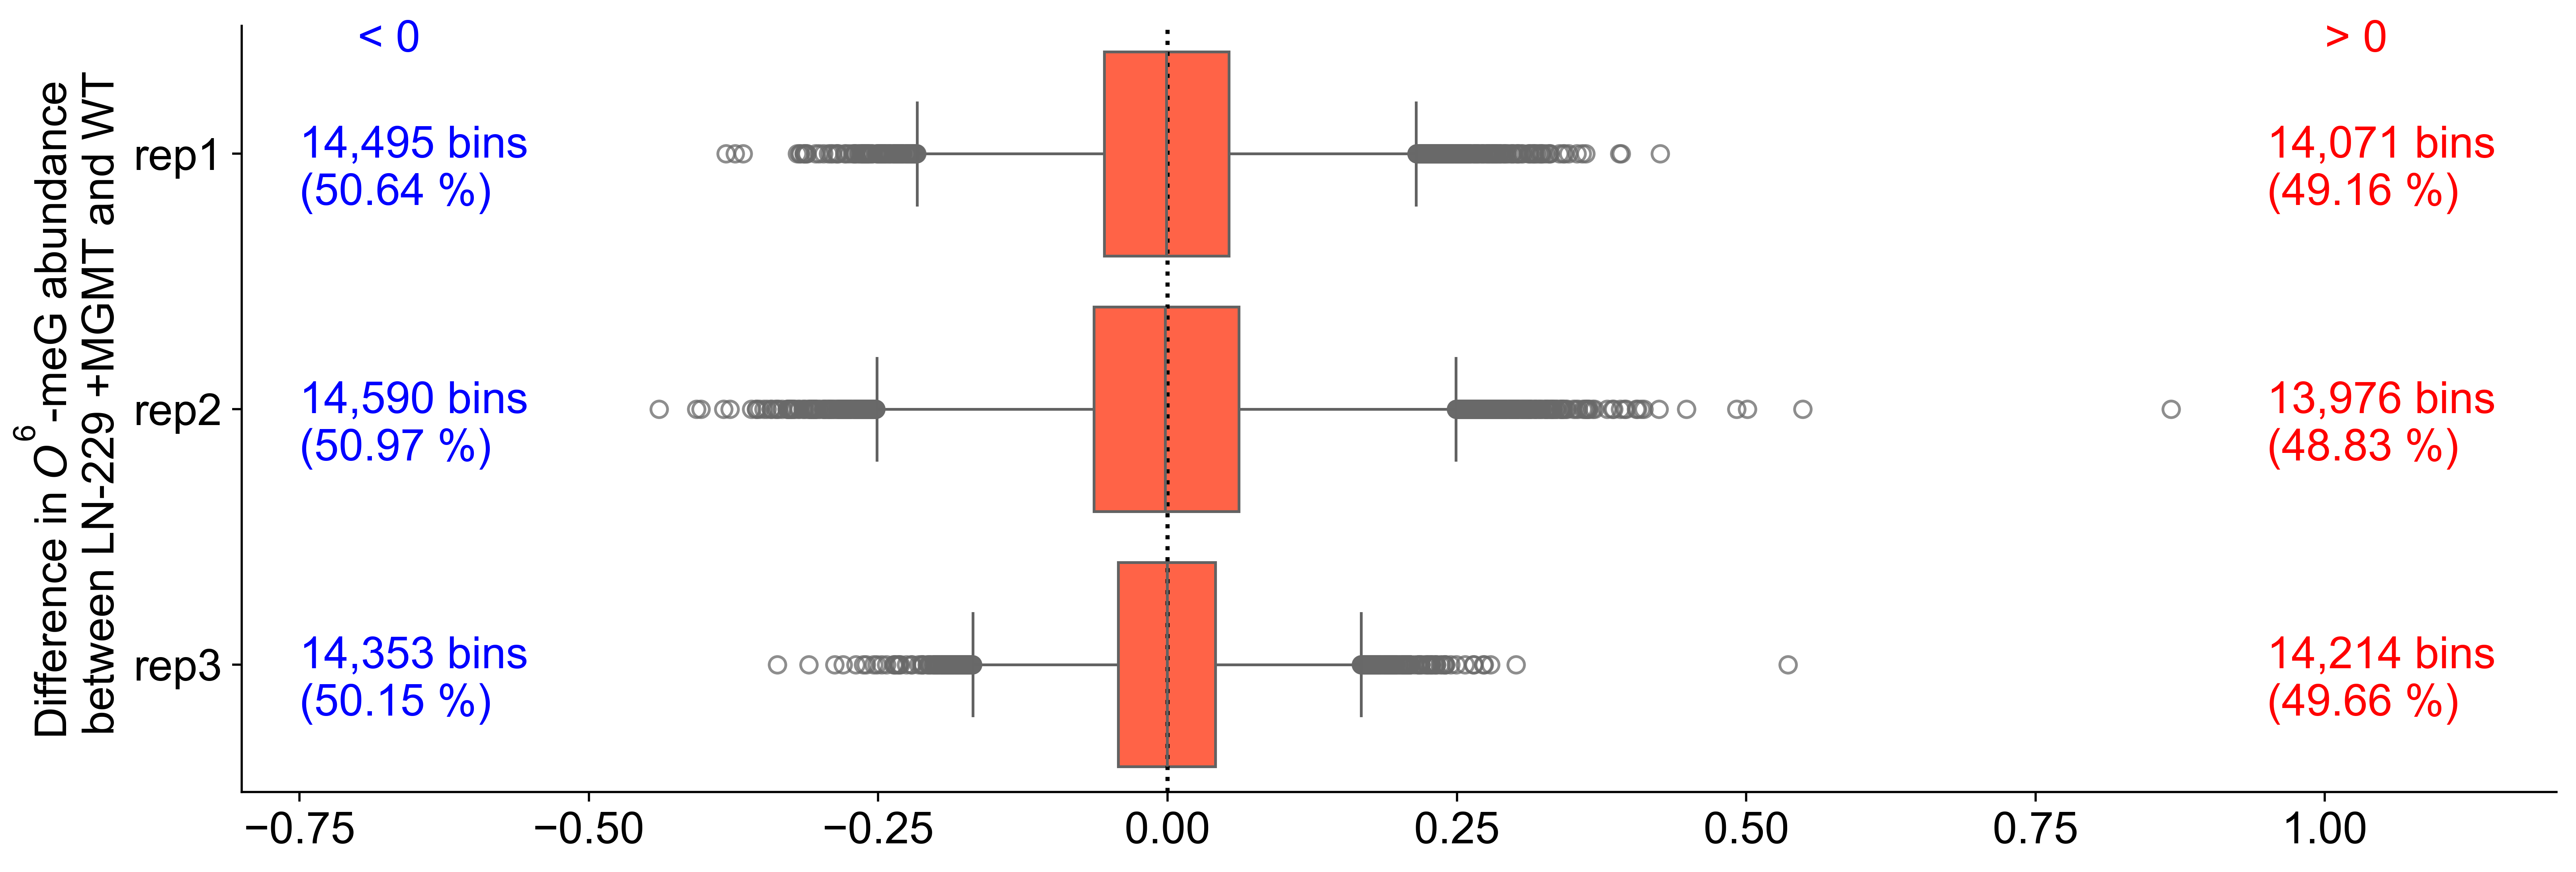

In [17]:
fig, ax = plt.subplots(figsize=(15,5), dpi = 500)

flierprops = dict(marker='o', markerfacecolor='None', markersize=6,  markeredgecolor='dimgrey', alpha = 0.75)
sns.boxplot(data = difference_nogaps, x = "MGMT_minus_WT", y = 'replicate', color = "tomato", 
            flierprops=flierprops, saturation = 1)

ax.axvline(0, ls= "dotted", color = "black")

ax.set_xlabel("")
ax.set_ylabel('Difference in $\mathit{O}^6$-meG abundance \n between LN-229 +MGMT and WT')

#negative bins
ax.text(-0.7,-0.4, '< 0', color='blue')

df = difference_nogaps[difference_nogaps['replicate'] == 'rep1']
p = '%.2f' % (len(df[df['MGMT_minus_WT'] < 0]) / len(df['MGMT_minus_WT']) * 100)
ax.text(-0.75, 0.2, 
        f"{len(df[df['MGMT_minus_WT'] < 0]):,} bins \n({p} %)",color='blue')

df = difference_nogaps[difference_nogaps['replicate'] == 'rep2']
p = '%.2f' % (len(df[df['MGMT_minus_WT'] < 0]) / len(df['MGMT_minus_WT']) * 100)
ax.text(-0.75, 1.2, 
        f"{len(df[df['MGMT_minus_WT'] < 0]):,} bins \n({p} %)",color='blue')

df = difference_nogaps[difference_nogaps['replicate'] == 'rep3']
p = '%.2f' % (len(df[df['MGMT_minus_WT'] < 0]) / len(df['MGMT_minus_WT']) * 100)
ax.text(-0.75, 2.2, 
        f"{len(df[df['MGMT_minus_WT'] < 0]):,} bins \n({p} %)",color='blue')

# positive bins
ax.text(1,-0.4, '> 0', color='red')

df = difference_nogaps[difference_nogaps['replicate'] == 'rep1']
p = '%.2f' % (len(df[df['MGMT_minus_WT'] > 0]) / len(df['MGMT_minus_WT']) * 100)
ax.text(0.95, 0.2, 
        f"{len(df[df['MGMT_minus_WT'] > 0]):,} bins \n({p} %)",color='red')

df = difference_nogaps[difference_nogaps['replicate'] == 'rep2']
p = '%.2f' % (len(df[df['MGMT_minus_WT'] > 0]) / len(df['MGMT_minus_WT']) * 100)
ax.text(0.95, 1.2, 
        f"{len(df[df['MGMT_minus_WT'] > 0]):,} bins \n({p} %)",color='red')

df = difference_nogaps[difference_nogaps['replicate'] == 'rep3']
p = '%.2f' % (len(df[df['MGMT_minus_WT'] > 0]) / len(df['MGMT_minus_WT']) * 100)
ax.text(0.95, 2.2, 
        f"{len(df[df['MGMT_minus_WT'] > 0]):,} bins \n({p} %)",color='red')


  
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_xlim(-0.8, 1.2)

fig.savefig(graph_path + 'MGMT_minus_WT_nDNA_difference_boxplot.png', bbox_inches='tight')

In [18]:
pip list

Package                              Version
------------------------------------ ---------------------
absl-py                              2.1.0
addict                               2.4.0
aiofiles                             22.1.0
aiohttp                              3.9.5
aiosignal                            1.3.1
aiosqlite                            0.20.0
alembic                              1.13.1
annotated-types                      0.7.0
anyio                                4.4.0
appdirs                              1.4.4
argon2-cffi                          23.1.0
argon2-cffi-bindings                 21.2.0
argparse-dataclass                   2.0.0
arrow                                1.3.0
asttokens                            2.4.1
astunparse                           1.6.3
async-lru                            2.0.4
attrs                                23.2.0
Babel                                2.15.0
beautifulsoup4                       4.12.3
biopython                   